<a href="https://colab.research.google.com/github/aayushme/Aayush_AI_Squad_Project1/blob/master/Musical_Instruments_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predition Of Trained Model**

**Importing Libraries**

In [3]:
!pip install opencv-python

In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

**Verify Video**

In [13]:
url="https://drive.google.com/uc?id=1ZJ4qLasV0rEPcIVbGLPUjtR9xKAjacaj"
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

**Making directory to save `export.pkl` and `Stage-1.pth`**

In [31]:
import os
os.makedirs("/content/trained_data", exist_ok=True)
my_dir = "/content/trained_data"

**Download `export.pkl` from https://drive.google.com/uc?id=1WYS2eKZOIN-XV1BEuC36LARsN347vaMA**

In [ ]:
%cd "/content/trained_data"
!wget -O"export.pkl" "https://drive.google.com/uc?id=1WYS2eKZOIN-XV1BEuC36LARsN347vaMA"

**Download `Stage-1.pth` from https://drive.google.com/uc?id=1BJhe9-DNv-SHG7THVDU3UBLxs-xRopg6**

In [ ]:
%cd "/content/trained_data"
!wget -O"Stage-1.pth" "https://drive.google.com/uc?id=1BJhe9-DNv-SHG7THVDU3UBLxs-xRopg6"

**Using OpenCV library Creating Frames and saving in data folder**

In [18]:
import cv2 
cam = cv2.VideoCapture(url) 

**Error Handling**

In [27]:
try: 
       
    if not os.path.exists('pred_data'): 
        os.makedirs('pred_data') 
  
except OSError: 
    print ('Error: Creating directory of data') 

In [28]:
currentframe = 0
  
while(True): 
      
     
    ret,frame = cam.read() 
  
    if ret: 
        
        name = './pred_data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)  
        cv2.imwrite(name, frame) 
  
        
        currentframe += 1
    else: 
        break

cam.release() 
cv2.destroyAllWindows() 

**Call Predictor**

In [35]:
predictor = load_learner(my_dir)

**Creating Predictor Function**

In [36]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [38]:
all_test_images=os.listdir("/content/pred_data")
all_test_images

['frame47.jpg',
 'frame45.jpg',
 'frame57.jpg',
 'frame40.jpg',
 'frame58.jpg',
 'frame1.jpg',
 'frame51.jpg',
 'frame60.jpg',
 'frame22.jpg',
 'frame31.jpg',
 'frame2.jpg',
 'frame27.jpg',
 'frame33.jpg',
 'frame3.jpg',
 'frame46.jpg',
 'frame0.jpg',
 'frame25.jpg',
 'frame49.jpg',
 'frame54.jpg',
 'frame43.jpg',
 'frame41.jpg',
 'frame7.jpg',
 'frame4.jpg',
 'frame39.jpg',
 'frame44.jpg',
 'frame20.jpg',
 'frame11.jpg',
 'frame37.jpg',
 'frame28.jpg',
 'frame5.jpg',
 'frame34.jpg',
 'frame29.jpg',
 'frame50.jpg',
 'frame6.jpg',
 'frame48.jpg',
 'frame55.jpg',
 'frame23.jpg',
 'frame53.jpg',
 'frame26.jpg',
 'frame10.jpg',
 'frame21.jpg',
 'frame42.jpg',
 'frame38.jpg',
 'frame18.jpg',
 'frame36.jpg',
 'frame8.jpg',
 'frame9.jpg',
 'frame12.jpg',
 'frame59.jpg',
 'frame19.jpg',
 'frame13.jpg',
 'frame14.jpg',
 'frame35.jpg',
 'frame30.jpg',
 'frame15.jpg',
 'frame56.jpg',
 'frame17.jpg',
 'frame24.jpg',
 'frame16.jpg',
 'frame32.jpg',
 'frame52.jpg']

**Prediction For Single Image**

piano


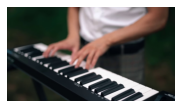

In [40]:
idx=0
print(my_predictor("/content/pred_data/"+all_test_images[idx]))
img = open_image("/content/pred_data/"+all_test_images[idx])
img.show()

**Plot Confusion Matrix**

In [ ]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

#**Making Video**

In [ ]:
test_files=os.listdir("pred_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("pred_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

**Making Url By Kora Drive**

In [ ]:
!pip install -U kora
from kora.drive import upload_public
url_is = upload_public('my_final_output.mp4')

**Display Video**

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url_is} width=500 controls/>""")